In [355]:
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import tempfile


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import itertools


In [356]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [357]:
def remove_stopwords(text):
    # remove punctuation
    chars = ['.', '/', ''', ''', '?', '!', '$', '%', '^', '&',
             '*', '(', ')', ' - ', '_', '+', '=', '@', ':',
             '\\', ',',
             '<', '>', '|', '[', ']', '{', '}',
             '–', '“',
             '»', '«', '1', '2',
             '3', '4', '5', '6', '7', '8', '9', '0']
    for c in chars:
        text= text.replace(c,' ').lower()
    text = text.split()
    import nltk
    # Caso seja preciso mudar o idioma, basta inserir o idioma desejado no parâmetro.
    stopwords = nltk.corpus.stopwords.words('portuguese')
    content = [w for w in text if w.lower().strip() not in stopwords]

    return content

In [358]:
count_0 = 0
count_1 = 0

list_0 = []
list_1 = []

documents = []
labels    = []

with open('data.csv', 'r',  encoding='utf-8') as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        if int(row[1]) == 0:
            count_0+=1
            list_0.append(row[0])
        else:
            count_1+=1
            list_1.append(row[0])    
        documents.append(row[0])
        labels.append(row[1])

In [359]:
print(f"count0 = {count_0}, count1 = {count_1}")
print(f"\nlist_0 = {list_0[:5]} \nlist_1 = {list_1[:5]}")

count0 = 148, count1 = 148

list_0 = ['wp time', ' boa', ' joga muito', ' nice', ' fez o basico'] 
list_1 = ['macaco', ' seu macaco', ' seu preto', ' yasuo lixo toxico podre', ' comi sua mãe']


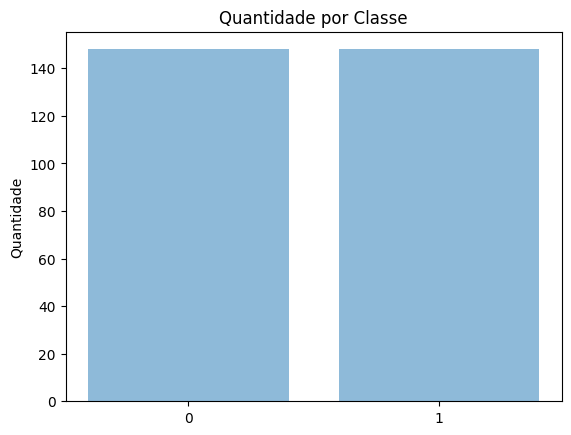

In [360]:
categories = ('0', '1')
y_pos = np.arange(len(categories))
performance = [count_0, count_1]

plt.bar(y_pos, performance, align='center',alpha=0.5)
plt.xticks(y_pos, categories)
plt.ylabel('Quantidade')
plt.title('Quantidade por Classe')

plt.show()

In [361]:
fp = tempfile.TemporaryFile(mode='w+t')
for j in list_1:
    fp.writelines(j)

fp.seek(0)
text = fp.read()
wordcloud = WordCloud().generate(text)

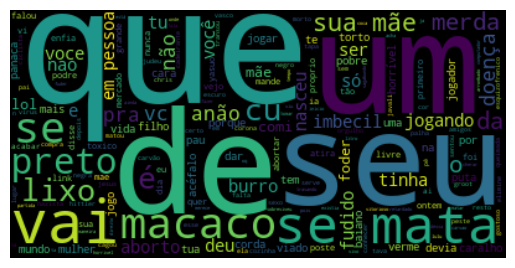

In [362]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [363]:
clean_documents = documents
# clean_documents = []
# for doc in documents:
#     cdoc = remove_stopwords(doc)
#     document = ' '.join(cdoc)
#     clean_documents.append(document)

In [364]:
vectorizer = TfidfVectorizer(use_idf=True)
X = vectorizer.fit_transform(clean_documents)
y = labels

In [365]:
def train(classifier, X, y, class_names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    ##TREINANDO MEU ALGORITMO
    classifier.fit(X_train, y_train)
    
    ##Predicoes para medição da Acurácia
    y_predictions = classifier.fit(X_train, y_train).predict(X_test)
    
    cnf_matrix = confusion_matrix(y_test, y_predictions)
    np.set_printoptions(precision=2)
    
    
    print(f"Acurracia: {classifier.score(X_test,y_test)}")
    print(f"F1: {str(f1_score(y_test, y_predictions, average=None ))}")
    print(f"Recall: {str(recall_score(y_test, y_predictions, average=None))}")
    print(f"Precision: {str(precision_score(y_test, y_predictions, average=None))}")
    
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Matriz de Confusao')
    
    plt.show()
    
    return classifier

Acurracia: 0.8314606741573034
F1: [0.83 0.83]
Recall: [0.88 0.79]
Precision: [0.79 0.88]
Confusion matrix, without normalization
[[37  5]
 [10 37]]


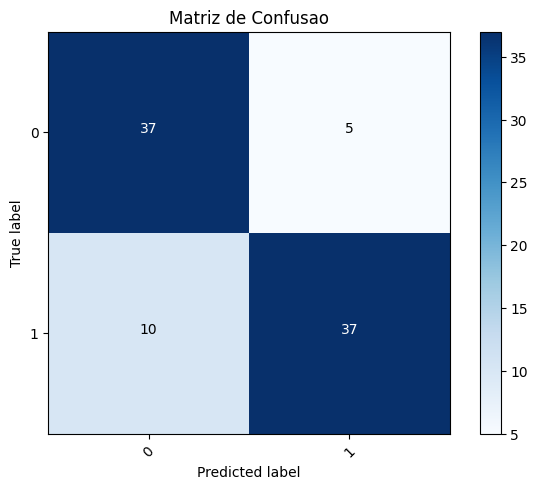

MultinomialNB(alpha=0.05)

In [366]:
train(MultinomialNB(alpha=0.05), X, y, [0, 1])

Acurracia: 0.8539325842696629
F1: [0.85 0.85]
Recall: [0.9  0.81]
Precision: [0.81 0.9 ]
Confusion matrix, without normalization
[[38  4]
 [ 9 38]]


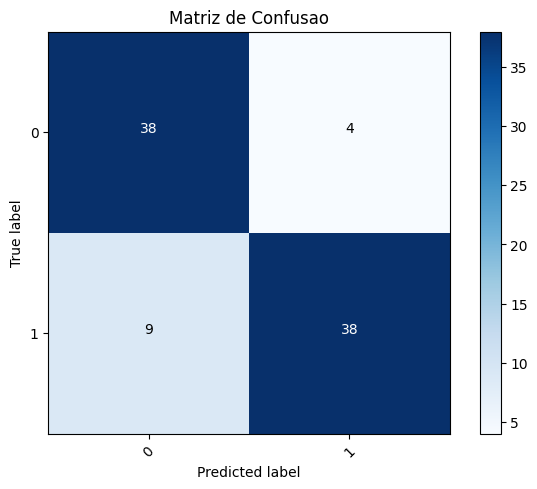

SVC(C=1, kernel='linear')

In [372]:
train(svm.SVC(kernel='linear', C=1), X, y, [0, 1])